In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*1]
a = [1]
b = [0.1]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

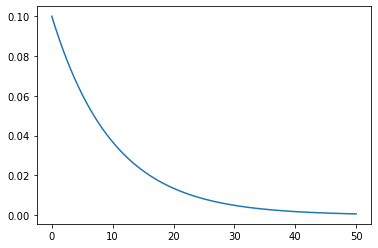

In [3]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 50, 0.01)

In [4]:
#lmd = lambda_dist.rvs(1)
#print(lmd)
w_dist = gen_w_dist(10)

In [5]:
w_dist.rvs(10)

array([[ 0.14695999, -0.28313445, -0.19542043, -0.11490962, -0.47602015],
       [-0.22188189,  0.09095957,  0.48735475,  0.12706991, -0.02001456],
       [ 0.03334874, -0.12462193,  0.11832419,  0.03674505, -0.41001156],
       [-0.23757231,  0.3879527 ,  0.11216551, -0.10500624,  0.67117311],
       [ 0.05983036,  0.13607825,  0.09184573, -0.31737313,  0.36179408],
       [ 0.39187522, -0.61913294, -0.03057484,  0.06151549, -0.76235997],
       [-0.56907826, -0.38677841,  0.32400029, -0.30353238,  0.475596  ],
       [ 0.49536113, -0.35286986,  0.20111036, -0.18503848,  0.52144707],
       [ 0.15343077, -0.24060817,  0.37231798, -0.55860471,  0.03563486],
       [-0.53905112, -0.49435161, -0.07600918,  0.11027937,  0.06431096]])

In [6]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

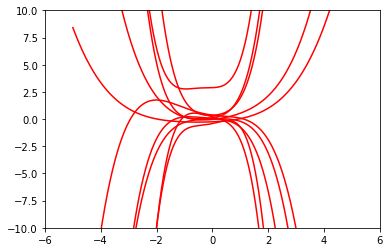

In [7]:
def draw_estimate(data, mus):
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for lmd in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-6,6)
    plt.ylim(-10,10)
    plt.show()
   
draw_estimates(10, data)